In [1]:
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Elevvo Internship/Loan Approval Prediction Description/loan_approval_dataset.csv'
data = pd.read_csv(path, skipinitialspace=True)
data.drop("loan_id", axis=1, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


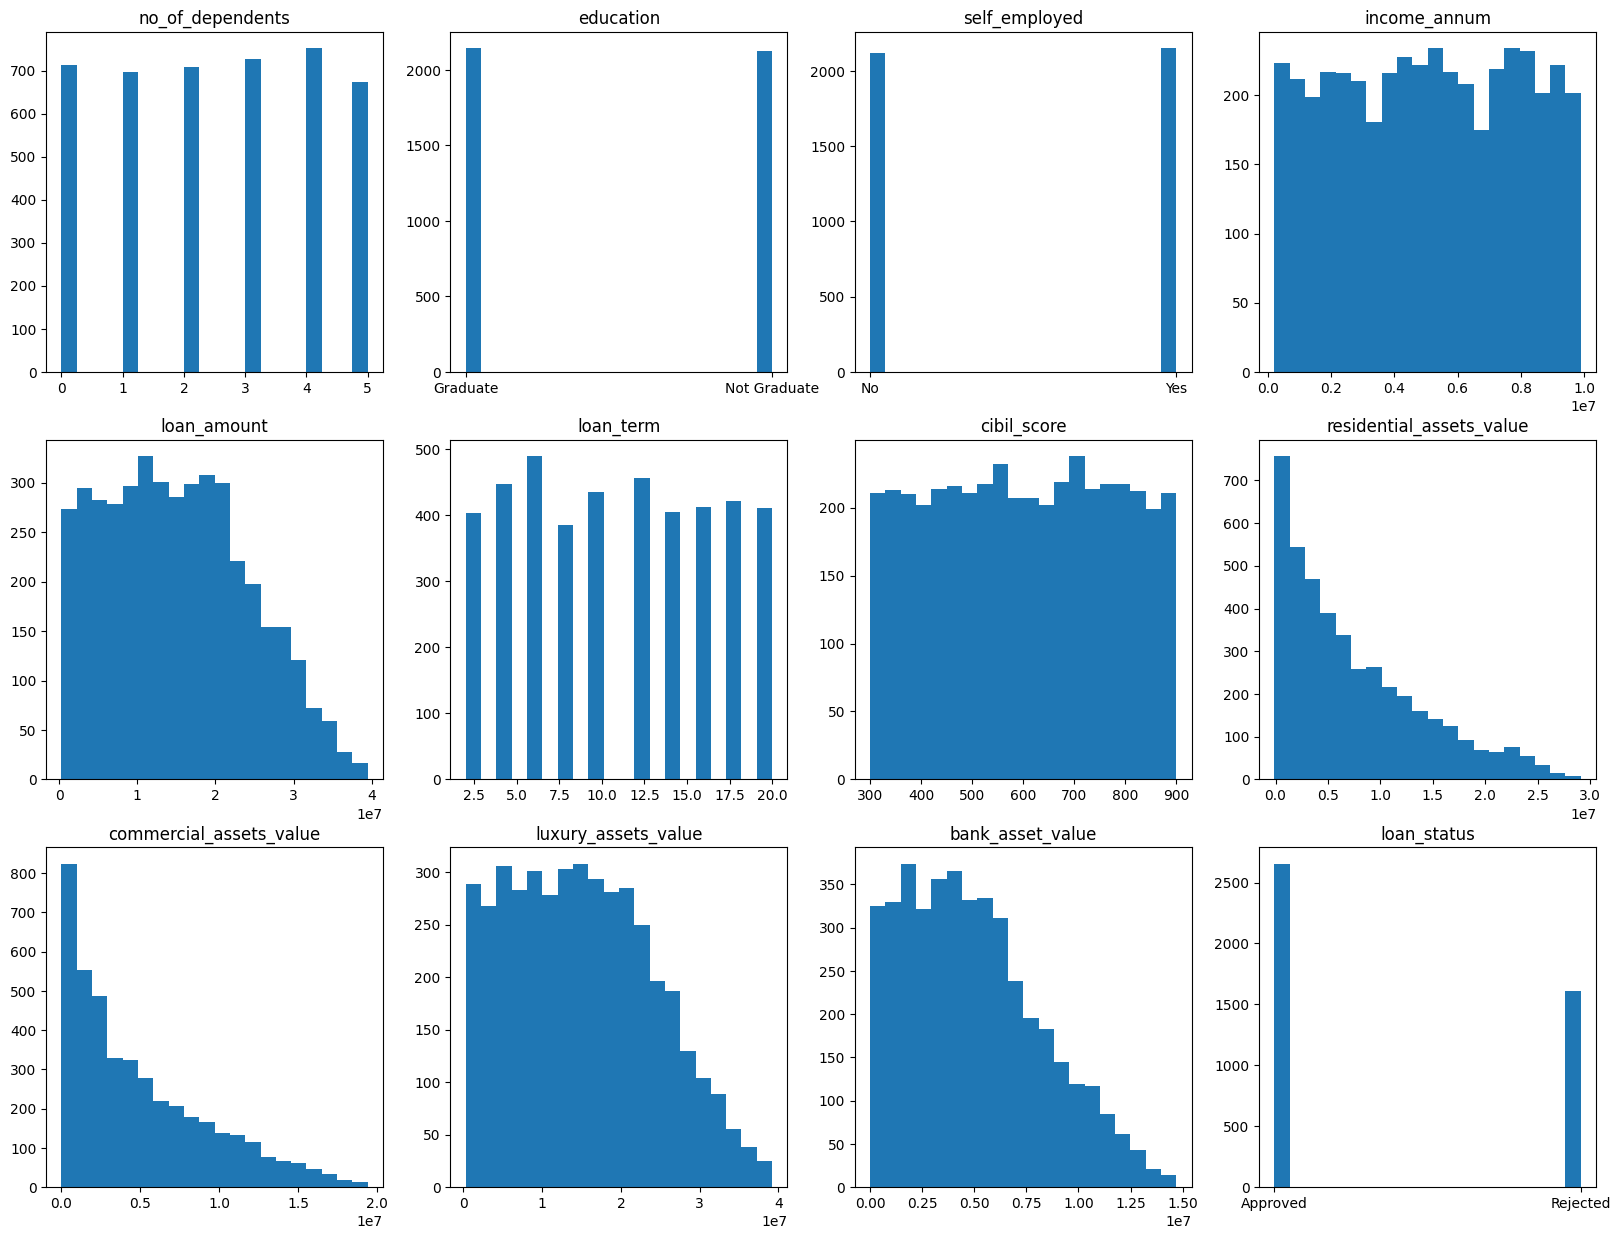

In [3]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

axes = axes.flatten()

for i in range(len(data.columns)):
  axes[i].hist(data.iloc[:, i], bins = 20)
  axes[i].set_title(data.columns[i])

In [4]:
mapping = {"Not Graduate": 0, "Graduate": 1,
           "No": 0, "Yes": 1,
           "Rejected": 0, "Approved": 1
}

data.replace(mapping, inplace=True)

/tmp/ipython-input-831226419.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(mapping, inplace=True)


In [5]:
x = data.drop("loan_status", axis=1)
y = data["loan_status"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
lr_model = LogisticRegression(max_iter=1000, verbose=1, n_jobs=-1)

lr_model.fit(x_train, y_train);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [8]:
yhat = lr_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, yhat))

Accuracy: 0.905152224824356


Text(0.5, 1.0, 'Confusion Matrix')

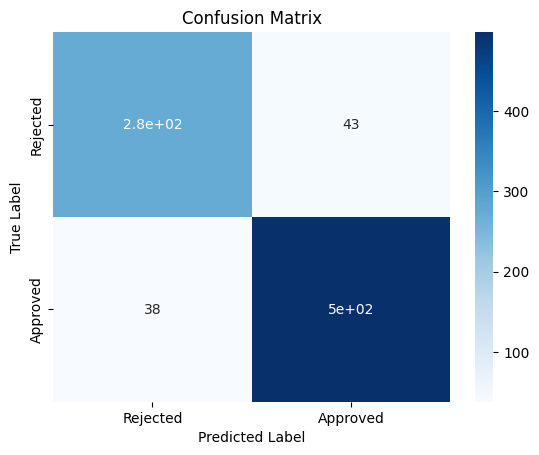

In [9]:
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')